In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-people-personality-types/data.csv


## Description about the dataset

This synthetic dataset is designed to explore and predict Myers-Briggs Type Indicator (MBTI) personality types based on a combination of demographic factors, interest areas, and personality scores. It includes 100K+ samples, each representing an individual with various features that contribute to determining their MBTI type. The dataset can be used to study correlations between different personality dimensions and external factors such as age, gender, education, and interests.

Feature Descriptions
> Age: A continuous variable representing the age of the individual.

> Gender: A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.

> Education: A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.

> Interest: A categorical variable representing the individual's primary area of interest.

> Introversion Score: A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion.

> Sensing Score: A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.

> Thinking Score: A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.

> Judging Score: A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging.

> Personality: Target that contains People Personality Type

# Personality Types
The 16 distinct personality types in target column for prediction :

> ISTJ (Introverted, Sensing, Thinking, Judging): The Inspector - Responsible, organized, and practical.

> ISFJ (Introverted, Sensing, Feeling, Judging): The Protector - Compassionate, detail-oriented, and loyal.

> INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.

> INTJ (Introverted, Intuition, Thinking, Judging): The Architect - Strategic, analytical, and independent.

> ISTP (Introverted, Sensing, Thinking, Perceiving): The Virtuoso - Adventurous, logical, and hands-on.

> ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.

> INFP (Introverted, Intuition, Feeling, Perceiving): The Mediator - Creative, empathetic, and idealistic.

> INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.

> ESTP (Extraverted, Sensing, Thinking, Perceiving): The Entrepreneur - Energetic, pragmatic, and action-oriented.

> ESFP (Extraverted, Sensing, Feeling, Perceiving): The Entertainer - Sociable, lively, and spontaneous.

> ENFP (Extraverted, Intuition, Feeling, Perceiving): The Campaigner - Enthusiastic, imaginative, and sociable.

> ENTP (Extraverted, Intuition, Thinking, Perceiving): The Debater - Innovative, energetic, and intellectually curious.

> ESTJ (Extraverted, Sensing, Thinking, Judging): The Executive - Organized, assertive, and pragmatic.

> ESFJ (Extraverted, Sensing, Feeling, Judging): The Consul - Caring, social, and organized.

> ENFJ (Extraverted, Intuition, Feeling, Judging): The Protagonist - Charismatic, empathetic, and organized.

> ENTJ (Extraverted, Intuition, Thinking, Judging): The Commander - Confident, strategic, and decisive.

### Python libraries

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
data = pd.read_csv('/kaggle/input/predict-people-personality-types/data.csv')
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## Data Cleaning & Transformation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


Let's check for the duplicate value

In [6]:
data.duplicated().sum()

0

There is no duplicates values in the dataset

Seeing the aboce result the dataset does not have missing and duplicate data
so we are doing to move to `exploratory data analysis`

## Exploratory data analysis

In [7]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


Let's start with the age column vs the gender column

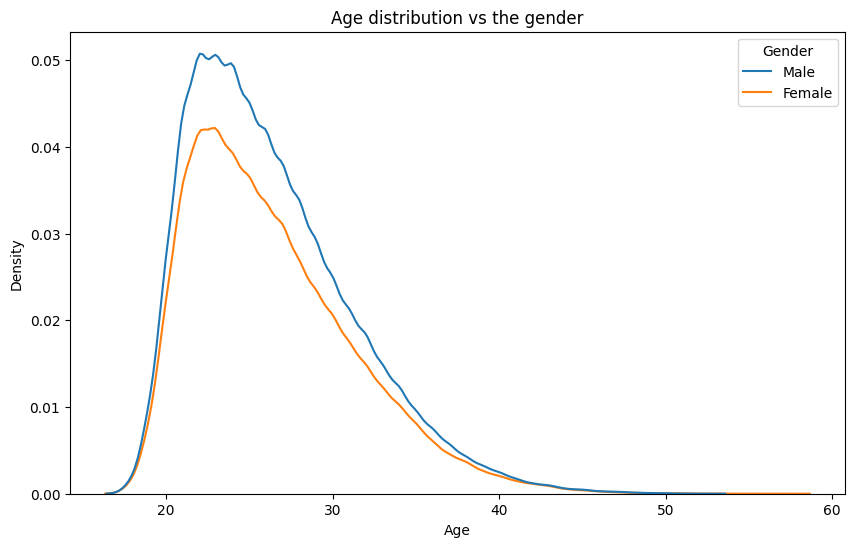

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(data, x='Age',  hue="Gender")
plt.title('Age distribution vs the gender')
plt.show()

In [9]:
Personality = data.groupby(["Personality"])[['Introversion Score','Thinking Score', 'Judging Score']].agg(lambda x: x.astype(float).mean())
pd.DataFrame(Personality)

,Introversion Score,Thinking Score,Judging Score
Personality,,,
ENFJ,7.004616,2.950930,6.397035
ENFP,7.010038,2.939706,4.373549
ENTJ,6.971154,7.878246,6.410599
ENTP,6.968431,7.861365,4.367352
ESFJ,7.031451,2.803107,6.470169
ESFP,7.025034,2.952078,4.349461
ESTJ,7.119486,7.888053,6.420271
ESTP,6.995538,7.790451,4.363636
INFJ,2.213627,2.998510,6.417193


Personality
ENFP    26.865322
ENTP    19.301739
INFP    19.296273
INTP    13.378000
ESFP     3.773202
ENFJ     3.032149
ISFP     2.698714
ESTP     2.603447
INFJ     2.279382
ENTJ     2.173183
ISTP     1.866298
INTJ     1.499285
ESFJ     0.432606
ESTJ     0.306104
ISFJ     0.289706
ISTJ     0.204590
Name: proportion, dtype: float64


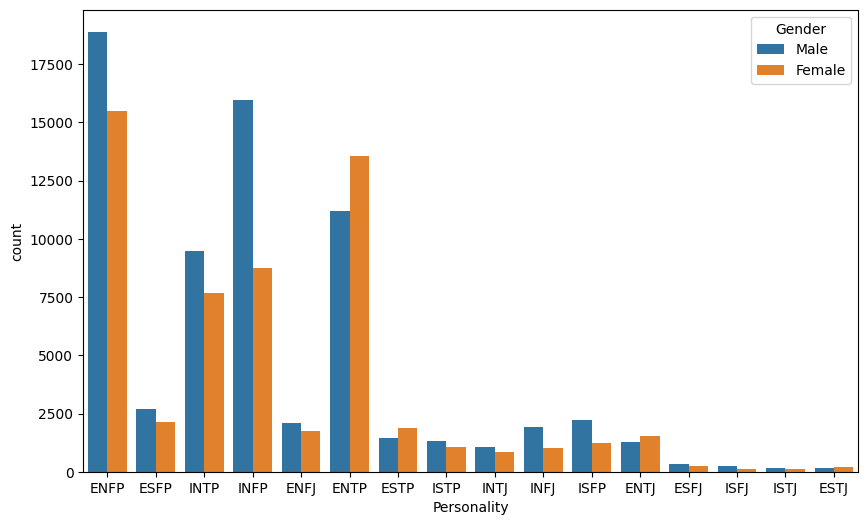

In [10]:
perso = data['Personality'].value_counts(normalize=True)*100
#test_result.plot(kind='bar')
print(perso)
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Personality', hue='Gender')
plt.show()

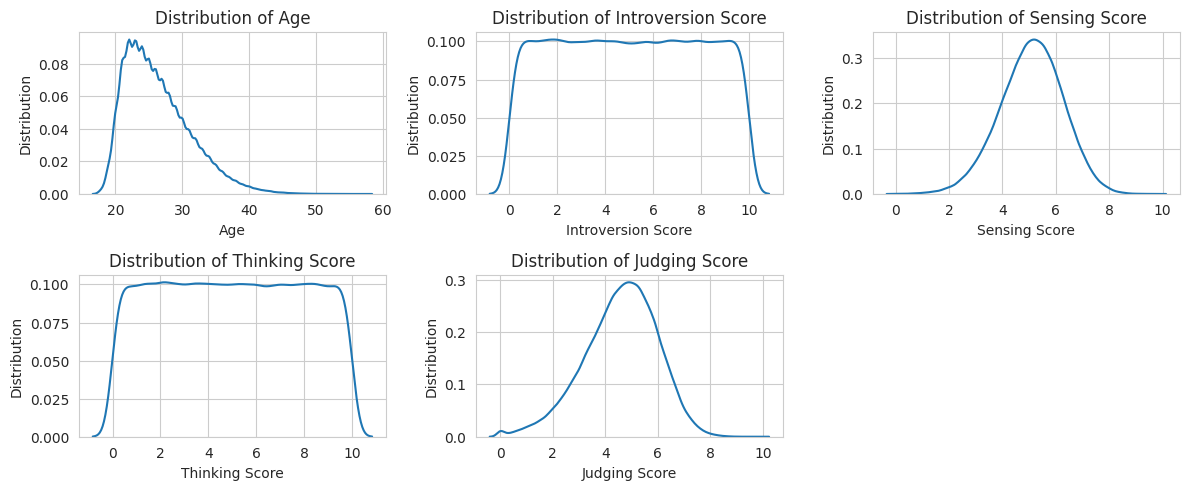

In [11]:
sns.set_style("whitegrid")

numeric = data.select_dtypes('float64','int64')

plt.figure(figsize=(12,7))
for i, column in enumerate(numeric.columns[:],1):
    plt.subplot(3,3,i)
    sns.kdeplot(numeric, x=data[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

Display all the unique containt in each column

In [12]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

Gender
['Male' 'Female']
--------------------------------------------------
Interest
['Unknown' 'Sports' 'Others' 'Technology' 'Arts']
--------------------------------------------------
Personality
['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']
--------------------------------------------------


will replace the target column with numeric values

In [13]:
data.replace({'Personality' : { 'ENFP' : 0, 'ESFP' : 1, 'INTP' : 2,'INFP':3,'ENFJ':4,'ENTP':5,'ESTP':6,'ISTP':7, 'INTJ':8,
                            'INFJ':9,'ISFP':10, 'ENTJ':11,'ESFJ':12,'ISFJ':13,'ISTJ':14,'ESTJ':15 }}, inplace=True)

In [14]:
data['Personality'].value_counts()

Personality
0     34404
5     24718
3     24711
2     17132
1      4832
4      3883
10     3456
6      3334
9      2919
11     2783
7      2390
8      1920
12      554
15      392
13      371
14      262
Name: count, dtype: int64

## Machine Learing model

In [15]:
data.columns


Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

## Create a LabelEncoder instance

Transform all the categorical values to numeric for machine learning model

In [16]:
# Columns to perform label encoding on
columns_to_encode = ['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest','Personality']

# Create a LabelEncoder instance
#select features for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()

# Apply label encoding to each column in columns_to_encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the DataFrame after label encoding
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,1,1,0,113895,123667,72752,51746,4,0
1,9,0,0,70396,104979,9761,46885,2,1
2,3,0,0,85190,10345,32154,80189,4,0
3,10,1,0,24369,51065,87924,108538,1,2
4,18,0,1,119199,48248,64049,63184,3,0


let's the colrrection of the columns

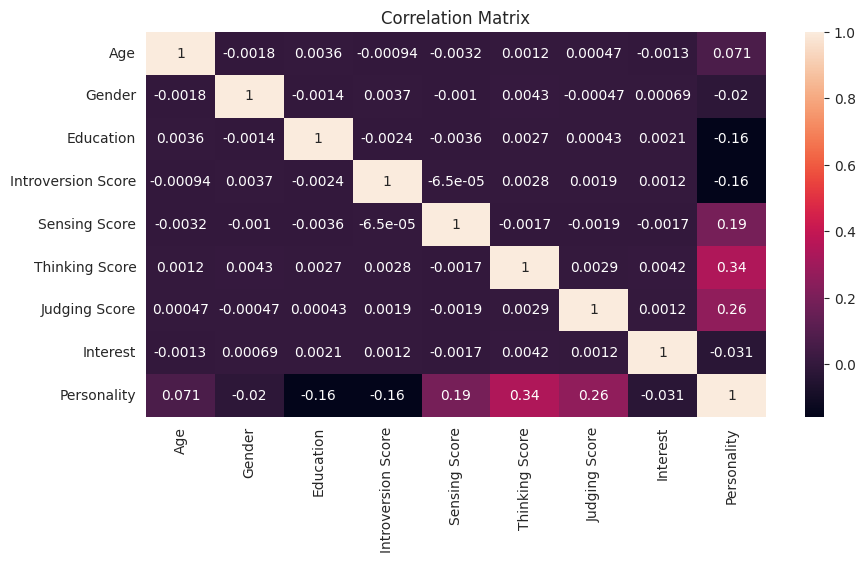

In [17]:
#Correlation metrix

plt.figure(figsize=(10,5))
df= data.corr()
sns.heatmap(df, annot=True)
plt.title("Correlation Matrix")
plt.show()


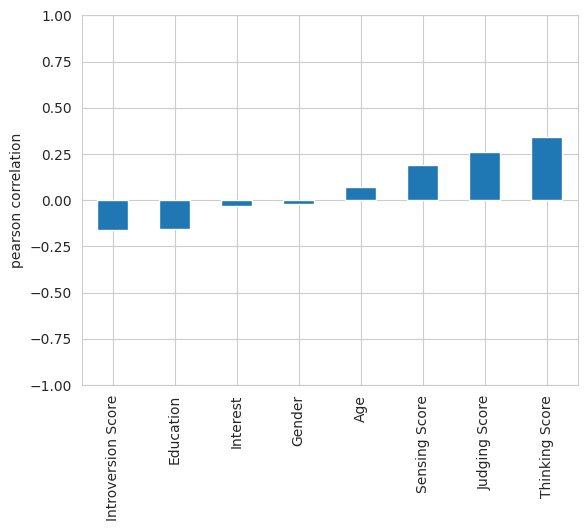

In [18]:
y = (data['Personality']).astype(int)
fields = list(df.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

## Train split the data 

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay, precision_score, recall_score


In [20]:
# Features and target
X= data.drop(columns=['Personality'], axis=1)
y = data['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state =42)

We use `StratifiedShuffleSplit` seeing we imbaleced target coloumn, so the above funcion split the dataset in proportion

In [21]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (89642, 8), y_train: (89642,)
Testing dataset shape, X_test: (38419, 8), y_test: (38419,)


Well done with the `StratifiedShuffleSplit` split

# Model Building


# 1. XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn import metrics

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)



In [23]:
# make predictions

from sklearn.metrics import mean_absolute_error
print("train Accuracy_scorer : " + str(accuracy_score(y_train, y_train_pred)))
print("test Accuracy_score : " + str(accuracy_score( y_test,y_test_pred)))

train Accuracy_scorer : 0.959695232145646
test Accuracy_score : 0.8979671516697467


Print out confusion matrix

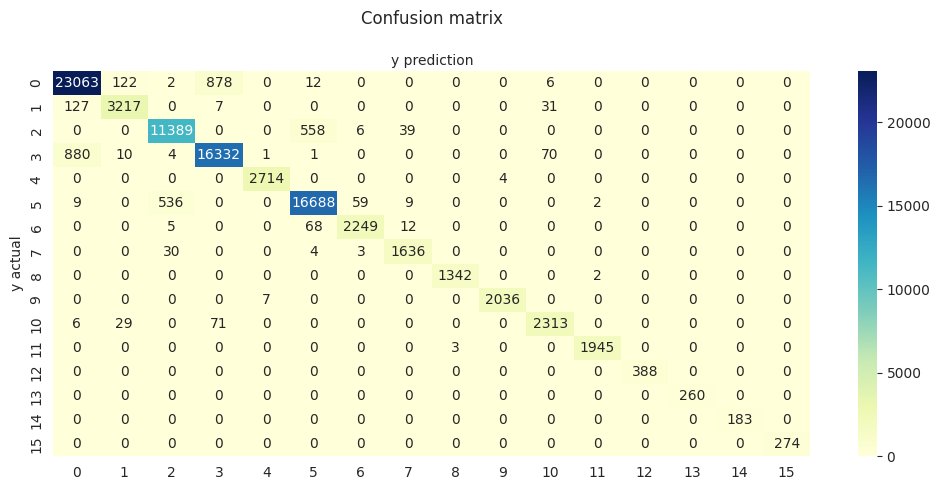

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24083
           1       0.95      0.95      0.95      3382
           2       0.95      0.95      0.95     11992
           3       0.94      0.94      0.94     17298
           4       1.00      1.00      1.00      2718
           5       0.96      0.96      0.96     17303
           6       0.97      0.96      0.97      2334
           7       0.96      0.98      0.97      1673
           8       1.00      1.00      1.00      1344
           9       1.00      1.00      1.00      2043
          10       0.96      0.96      0.96      2419
          11       1.00      1.00      1.00      1948
          12       1.00      1.00      1.00       388
          13       1.00      1.00      1.00       260
          14       1.00      1.00      1.00       183
          15       1.00      1.00      1.00       274

    accuracy                           0.96     89642
   macro avg       0.98   

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_train, y_train_pred))

# 2.Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=0)
rfc = rfc = RandomForestClassifier(n_estimators=50,random_state=42, oob_score=False)
rfc = rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test,)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.8984356698508551


Print out the confusion metrix heatmap

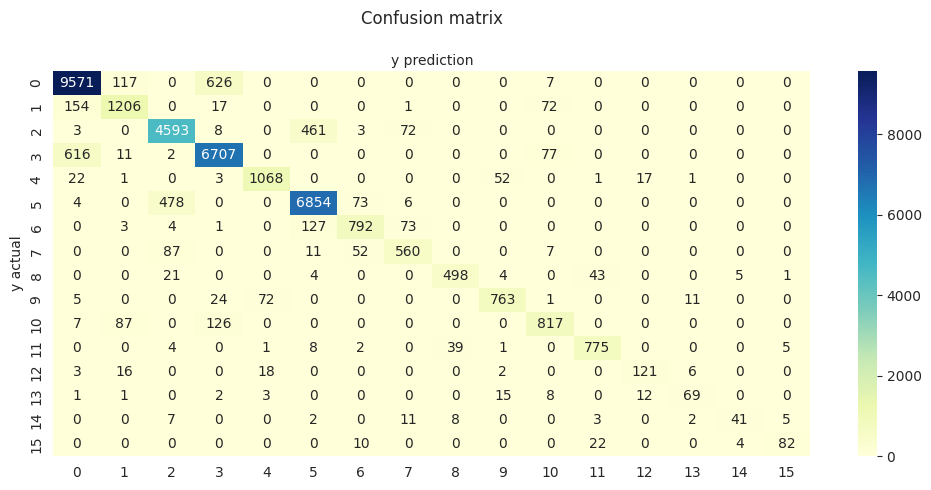

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10321
           1       0.84      0.83      0.83      1450
           2       0.88      0.89      0.89      5140
           3       0.89      0.90      0.90      7413
           4       0.92      0.92      0.92      1165
           5       0.92      0.92      0.92      7415
           6       0.85      0.79      0.82      1000
           7       0.77      0.78      0.78       717
           8       0.91      0.86      0.89       576
           9       0.91      0.87      0.89       876
          10       0.83      0.79      0.81      1037
          11       0.92      0.93      0.92       835
          12       0.81      0.73      0.77       166
          13       0.78      0.62      0.69       111
          14       0.82      0.52      0.64        79
          15       0.88      0.69      0.78       118

    accuracy                           0.90     38419
   macro avg       0.87   

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))

#### I will use XGBoost Model to build a Predictive system base on train data

In [27]:
X_test.iloc[74:75]

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
53730,8,1,1,41302,115941,63107,90579,4


In [28]:
# will rondomly select the array to test the our model buld 
input_data = X_test.iloc[74:75]

#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = xgb_clf.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
    print('ENFP (Extraverted, Intuition, Feeling, Perceiving): The Campaigner - Enthusiastic, imaginative, and sociable')

elif prediction == 1:
    print('ESFP (Extraverted, Sensing, Feeling, Perceiving): The Entertainer - Sociable, lively, and spontaneous.')
elif prediction == 2:
    print('INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.')
elif prediction == 3:
    print('INFP (Introverted, Intuition, Feeling, Perceiving): The Mediator - Creative, empathetic, and idealistic.')
elif prediction == 4:
    print('INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.')
elif prediction == 5:
    print('ENTP (Extraverted, Intuition, Thinking, Perceiving): The Debater - Innovative, energetic, and intellectually curious.')
elif prediction == 6:
    print('ESTP (Extraverted, Sensing, Thinking, Perceiving): The Entrepreneur - Energetic, pragmatic, and action-oriented.')
elif prediction == 7:
    print('ISTP (Introverted, Sensing, Thinking, Perceiving): The Virtuoso - Adventurous, logical, and hands-on.')
elif prediction == 8:
    print('INTJ (Introverted, Intuition, Thinking, Judging): The Architect - Strategic, analytical, and independent.')
elif prediction == 9:
    print('INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.')
elif prediction == 10:
    print('ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.')
elif prediction == 11:
    print('ENTJ (Extraverted, Intuition, Thinking, Judging): The Commander - Confident, strategic, and decisive.')
elif prediction == 12:
    print('ESFJ (Extraverted, Sensing, Feeling, Judging): The Consul - Caring, social, and organized.')
elif prediction == 13:
    print('ISFJ (Introverted, Sensing, Feeling, Judging): The Protector - Compassionate, detail-oriented, and loyal.')
elif prediction == 14:
    print('ISTJ (Introverted, Sensing, Thinking, Judging): The Inspector - Responsible, organized, and practical.')

else:
    print('ESTJ (Extraverted, Sensing, Thinking, Judging): The Executive - Organized, assertive, and pragmatic.')

print('This statement is correctly executed')

[10]
ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.
This statement is correctly executed


XGBoost is the best model with acc of 95% on training set

### Thanks for going through this notebook if you like it please upvote 